<a href="https://colab.research.google.com/github/JanePer/AI---PORTFOLIO/blob/main/Task15_(Lite)_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kластеризация базы покупок интернет-магазина

#Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras import utils #for OHE
from keras.preprocessing.text import Tokenizer, text_to_word_sequence, tokenizer_from_json
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import DB

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/online_carts.csv")
df

,Unnamed: 0,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Период: Февраль 2019 г. - Август 2019 г.,NaN,NaN,NaN
1,NaN,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),NaN,NaN
2,NaN,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),NaN
3,NaN,Отборы:\nПодразделение В списке (estel.m-cosme...,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
99627,NaN,Kapous Блеск-шампунь Brilliants gloss 250 мл,347,1,NaN
99628,NaN,Крем-бальзам-архитектор волос для восстановле...,345,1,NaN
99629,NaN,Услуга доставки DPD до двери,350,1,NaN
99630,NaN,Шампунь разглаживающий с глиоксиловой кислот...,304,1,NaN


In [ ]:
print(df['Unnamed: 0'].unique())
print('\n')
print(df['Unnamed: 2'].unique())
print('\n')
print(df['Unnamed: 3'].unique())
print('\n')
print(df['Unnamed: 4'].unique())

[nan]


[nan ' Количество(Базовых ед.)' ' ЗаказПокупателя.ID заказа (Элементы)'
 ... '3472' '7616' '2731']


[nan ' Номенклатура.Наименование (Элементы)' 'Количество' 'Базовых ед.'
 '9' '1' '4' '797' '162' '3' '2' '5' '7' '8' '6' '49' '10' '34' '11' '25'
 '20' '13' '17' '29' '1130' '148' '12' '40' '14' '50' '68' '51' '23' '22'
 '16' '1096' '105' '124' '139' '19' '15' '26' '30' '21' '504' '28' '575'
 '60' '61' '18' '80' '942' '44' '188' '24' '1375' '147' '137' '33' '597'
 '82' '37' '860' '47' '825' '27' '45' '229' '887' '113' '58' '104' '38'
 '1751' '134' '138' '1214' '341' '168' '81' '88' '1074' '150' '32' '52'
 '43' '1023' '64' '72' '31' '39' '1237' '254' '46' '289' '1938' '456'
 '132' '2689' '599' '1771' '181' '322' '77' '556' '90' '256' '42' '57'
 '35' '883' '118' '1078' '145' '2749' '36' '1360' '85' '893' '214' '692'
 '119' '1533' '239' '650' '93' '70' '1551' '158' '78' '102' '780' '291'
 '41' '1278' '140' '48' '161' '1127' '122' '94' '978' '98' '769' '92'
 '159' '720' '69' '56' '1

#Parsing DB

In [ ]:
new_df=df.drop(['Unnamed: 0'], axis=1)
new_df.insert(0, column='Date', value=[x for x in range(len(new_df))])
new_df=new_df.fillna('unknown')
new_df.head(30)

,Date,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,Период: Февраль 2019 г. - Август 2019 г.,unknown,unknown,unknown
1,1,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),unknown,unknown
2,2,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),unknown
3,3,Отборы:\nПодразделение В списке (estel.m-cosme...,unknown,unknown,unknown
4,4,unknown,unknown,unknown,unknown
5,5,ЗаказПокупателя.Дата оправки,Стоимость продажи (руб.),Количество,unknown
6,6,ЗаказПокупателя.ID заказа,С НДС,Базовых ед.,unknown
7,7,Номенклатура.Наименование,unknown,unknown,unknown
8,8,unknown,unknown,unknown,unknown
9,9,01.01.2019 0:00:00,26236,9,unknown


In [ ]:
date_list=list(new_df[new_df['Валовая прибыль'].str.contains("\d\d.\d\d.2019")].index)
date_list[:5]

[9, 21, 28, 703, 1703]

In [ ]:
indx=0
for i in range(len(new_df)):
  if i in date_list:
    indx=i
  new_df['Date'][i]=new_df['Валовая прибыль'][indx]
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Date,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Период: Февраль 2019 г. - Август 2019 г.,Период: Февраль 2019 г. - Август 2019 г.,unknown,unknown,unknown
1,Период: Февраль 2019 г. - Август 2019 г.,Показатели: Стоимость продажи (руб.)(С НДС),Количество(Базовых ед.),unknown,unknown
2,Период: Февраль 2019 г. - Август 2019 г.,Группировки строк: ЗаказПокупателя.Дата оправк...,ЗаказПокупателя.ID заказа (Элементы),Номенклатура.Наименование (Элементы),unknown
3,Период: Февраль 2019 г. - Август 2019 г.,Отборы:\nПодразделение В списке (estel.m-cosme...,unknown,unknown,unknown
4,Период: Февраль 2019 г. - Август 2019 г.,unknown,unknown,unknown,unknown
...,...,...,...,...,...
99627,02.09.2019 0:00:00,Kapous Блеск-шампунь Brilliants gloss 250 мл,347,1,unknown
99628,02.09.2019 0:00:00,Крем-бальзам-архитектор волос для восстановле...,345,1,unknown
99629,02.09.2019 0:00:00,Услуга доставки DPD до двери,350,1,unknown
99630,02.09.2019 0:00:00,Шампунь разглаживающий с глиоксиловой кислот...,304,1,unknown


In [ ]:
new_df=new_df.drop(new_df[new_df['Date'].str.contains("Период")].index, axis=0)
new_df=new_df.drop(new_df[new_df['Валовая прибыль'].str.contains("unknown")].index, axis=0)
new_df=new_df.drop(new_df[new_df['Валовая прибыль'].str.contains(r"^Услуга доставки.*")].index, axis=0)
new_df=new_df.drop(new_df[new_df['Валовая прибыль']== new_df['Date']].index)
new_df=new_df.reset_index(drop=True)
print(len(new_df))
new_df.head()

90283


,Date,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,01.01.2019 0:00:00,MCOSM13113,26236,9,unknown
1,01.01.2019 0:00:00,CONTURA (HS61) машинка для стрижки волос,9059,1,unknown
2,01.01.2019 0:00:00,Holika Holika Универсальный гель 99% алоэ вера...,539,1,unknown
3,01.01.2019 0:00:00,Kapous Бальзам-уход для придания объема Volume...,181,1,unknown
4,01.01.2019 0:00:00,Kapous Шампунь для придания объема Volume up 3...,181,1,unknown


In [ ]:
cart_list = list(new_df[new_df['Валовая прибыль'].str.contains("MCOSM")].index)
cafre_list = list(new_df[new_df['Валовая прибыль'].str.contains("CAFRE")].index)
print(len(cart_list))
print(len(cafre_list))
print(cart_list[:10])
print(cart_list[-1])
print(cafre_list[:10])

13567
74
[0, 8, 145, 146, 150, 155, 164, 169, 173, 177]
90278
[109, 723, 1542, 2318, 2321, 2335, 5342, 6653, 6659, 6664]


In [ ]:
new_df.head(200)

,Date,Валовая прибыль,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,01.01.2019 0:00:00,MCOSM13113,26236,9,unknown
1,01.01.2019 0:00:00,CONTURA (HS61) машинка для стрижки волос,9059,1,unknown
2,01.01.2019 0:00:00,Holika Holika Универсальный гель 99% алоэ вера...,539,1,unknown
3,01.01.2019 0:00:00,Kapous Бальзам-уход для придания объема Volume...,181,1,unknown
4,01.01.2019 0:00:00,Kapous Шампунь для придания объема Volume up 3...,181,1,unknown
...,...,...,...,...,...
195,01.02.2019 0:00:00,OLLIN SERVICE LINE Шампунь для придания холодн...,359,1,unknown
196,01.02.2019 0:00:00,OLLIN VISION black (черный) Крем-краска для бр...,235,1,unknown
197,01.02.2019 0:00:00,"Semi De Line - Бальзам Семя льна,питательный ...",1437,3,unknown
198,01.02.2019 0:00:00,Y SF067 P Пилка рисунок 240/240 ромашка в инд...,106,2,unknown


In [ ]:
carts=[]
cart=[]
i=0
val=new_df['Валовая прибыль']
allPositions=[]

for i in range(len(new_df)):
  if i!=len(new_df) and i in cart_list and i!=cart_list[-1]:
    ind=cart_list.index(i)
    while i<cart_list[ind+1]-1:
      cart.append(val[i+1])
      allPositions.append(val[i+1]) 
      i+=1
    carts.append(cart)         
    cart=[]
  elif i!=len(new_df) and i in cart_list and i==cart_list[-1]:
    while i<(len(new_df)-1):
      cart.append(val[i+1])
      allPositions.append(val[i+1]) 
      i+=1
    carts.append(cart)         
    cart=[]

  else:
    i+=1                  

In [ ]:
print(len(carts)==len(cart_list)) 
print('Количество всех позиций: ', len(allPositions)) 
print('Количество всех корзин: ', len(carts)) 
print('\n')
for i in range(10):
    print(carts[i])

True
Количество всех позиций:  76716
Количество всех корзин:  13567


['CONTURA (HS61) машинка для стрижки волос', 'Holika Holika Универсальный гель 99% алоэ вера, 250 мл', 'Kapous Бальзам-уход для придания объема Volume up 350 мл', 'Kapous Шампунь для придания объема Volume up 350 мл', 'XPERT (HS71) машинка для стрижки волос', 'ЛП ТНА САВАЖ ПАНАШ 250 мл', 'перчатки (50 пар) винил размер S черные']
['OLLIN SERVICE LINE Увлаж. Бальзам для волос 1000 мл', 'OLLIN SERVICE LINE Шампунь.-стабилизатор рН 3.5 1000 мл', 'Масло-уход для светлых волос  ESTEL PRIMA BLONDE 100 мл.', '/101 Крем-краска ESTEL PRINCESS ESSEX пепельный', '/44 Крем-краска ESTEL PRINCESS ESSEX медный', '0/00 Стойкая крем-краска чистый тон', '0/00N Крем-краска ESTEL PRINCESS ESSEX нейтральный', '0/11 Крем-краска ESTEL PRINCESS ESSEX синий', '0/22 Крем-краска ESTEL PRINCESS ESSEX зеленый', '0/33 Крем-краска ESTEL PRINCESS ESSEX желтый', '0/33 Стойкая крем-краска интенсивный золотистисты', '0/55 Крем-краска ESTEL PRINCESS ES

In [ ]:
carts_full=[]
for i in range(len(carts)):
  if len(carts[i])>0:
    carts_full.append(carts[i])

print('Количество всех позиций: ', len(allPositions)) 
print('Количество всех полных корзин: ', len(carts_full)) 
print('Пример того, что лежит в корзине: ', carts_full[2])

Количество всех позиций:  76716
Количество всех полных корзин:  12638
Пример того, что лежит в корзине:  ['Восстанавливающий эликсир LuxeOil 100 мл.', 'Маска для восстановления кератина LuxeOil 400 мл.', 'Шампунь для защиты кератина LuxeOil 1000 мл.']


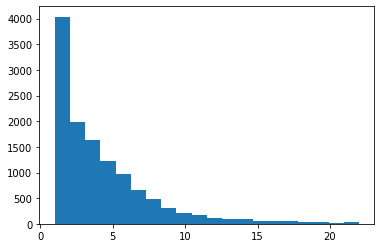

In [ ]:
# Отобразим гистограмму размеров корзин
plt.hist([len(c) for c in carts_full], 20, [1, 22])
plt.show()

In [ ]:
labelEncoder = LabelEncoder()  # Создаем объект LabelEncoder 
labelEncoder.fit(allPositions) # Обрабатываем все имеющиеся позиции товаров

LabelEncoder()

In [ ]:
maxPositionsCount = max(labelEncoder.transform(allPositions))+1 # Посчитаем количество уникальных товаров
print(maxPositionsCount)

6658


In [ ]:
cartsIndexes = [labelEncoder.transform(c) for c in carts_full] # Создаем список индексов для каждой корзины
n = 5                  # Укажем номер корзины
print(carts_full[n])        # Отобразим содержимое этой корзины
print(cartsIndexes[n]) # Отобразим соответствующие индексы

['Бальзам для интенсивного увлажнения волос OTIUM AQUA 1000 мл.', 'Восстанавливающий эликсир LuxeOil 100 мл.', 'Оттеночный бальзам-уход для холодных светлых оттенков 200 мл.', 'Шампунь для интенсивного увлажнения волос OTIUM AQUA 1000 мл.']
[3138 3323 4860 5820]


In [ ]:
'''
  Функция преобразования вектора по приницпу bag of words
    Входные параметры:
      - trainVector - исходный вектор индексов слов
      - wordsCount - установленная длинна вектора
    Функция возращает: 
      - сформированный вектор из 0 и 1
'''
def changeXTo01(trainVector, wordsCount):
  out = np.zeros(wordsCount)                   # Создаем вектор из нулей длинной wordsCount
  for x in trainVector:                        # Пробегаем по всем индексам в trainVector
    out[x] = 1                                 # Изменяем на 1 значение out в позиции текущего индекса 
  return out                                   # Возвращаем сформированный вектор


'''
  Функция преобразования выборки (обучающей или проверочной) по принципе Bag of words
    Входные параметры:
      - trainSet - выборка
      - wordsCount - установленная длинна вектора
    Функция возращает: 
      - сформированная выборка из 0 и 1
'''
def changeSetTo01(trainSet, wordsCount):
  out = []                                     # Создаем пустой список  
  for x in trainSet:                           # Пробегаем по всем элемента выборки
    out.append(changeXTo01(x, wordsCount))     # Получаем вектор Bag of words для текущего элемента    
  return np.array(out)                         # Возрващаем сформированную выборку

In [ ]:
carts01 = changeSetTo01(cartsIndexes, maxPositionsCount) # Создаем выборку по принципу bag of words
n = 5                  # Указываем номер корзины
print(carts_full[n])        # Выводим содержимое корзины
print(cartsIndexes[n]) # Выводим список соответствующих индексов
print(carts01[n])      # Выводим соответсвующий список bag of words

['Бальзам для интенсивного увлажнения волос OTIUM AQUA 1000 мл.', 'Восстанавливающий эликсир LuxeOil 100 мл.', 'Оттеночный бальзам-уход для холодных светлых оттенков 200 мл.', 'Шампунь для интенсивного увлажнения волос OTIUM AQUA 1000 мл.']
[3138 3323 4860 5820]
[0. 0. 0. ... 0. 0. 0.]


#Clustering on 50 clusters

In [ ]:
qty_clusters=50
cur_time = time.time()                                  # Указываем количество кластеров
kmean = KMeans(qty_clusters)                        # Создаем объект KMeans
kmean.fit(carts01)                                   # Производим кластеризацию набора carts01
labels = kmean.labels_                               # Сохраняем метки в переменную labels

print('Время обработки: ', round(time.time() - cur_time,2),'c')
clusterSize = [sum(labels==i) for i in range(0, qty_clusters)] # Создадим список размеров каждого кластера

Время обработки:  203.99 c


In [ ]:
#количества уникальных позиций в классе
qty_unique_pos_allclusters=[]
qty_all_pos_allclusters=[]
for i in range(0, qty_clusters):
  dictionary_pos={}
  cluster_positions=np.sum(carts01[labels==i],axis=0)
  qty_all_pos_allclusters.append(cluster_positions)
  for j in range(0, cluster_positions.shape[0]):
    pos=cluster_positions[j]
    if pos>0 and j not in dictionary_pos:
      dictionary_pos[j]=1
    else:
      dictionary_pos[j]=0
  sum_uniq=sum(dictionary_pos.values())
  qty_unique_pos_allclusters.append(sum_uniq)

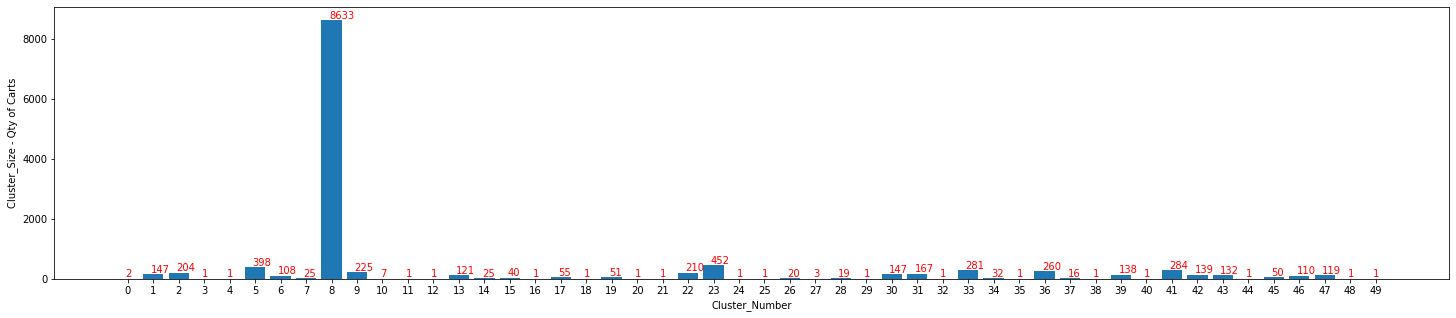

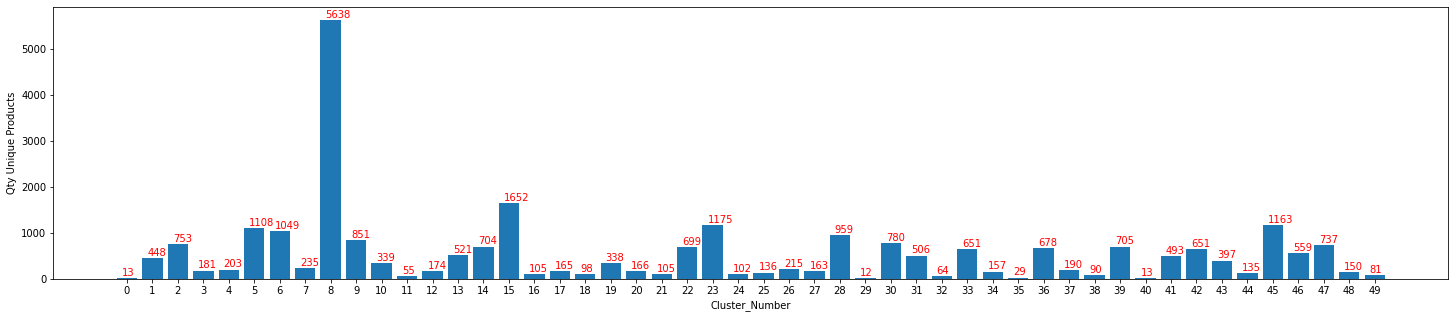

In [ ]:
# Отобразим Распределения размеров классов: сколько корзин
fig = plt.figure(figsize=(25,5))
ind = np.arange(qty_clusters)
plt.bar(ind,clusterSize)
plt.xticks(ind)
for i, s in enumerate(clusterSize):
  plt.text(i-0.1, s+50, str(s), color="red")
plt.ylabel("Cluster_Size - Qty of Carts")
plt.xlabel("Cluster_Number")
plt.show()

# Отобразим Распределение количества уникальных позиций в классе
fig = plt.figure(figsize=(25,5))
ind = np.arange(qty_clusters)
plt.bar(ind,qty_unique_pos_allclusters)
plt.xticks(ind)
for i, s in enumerate(qty_unique_pos_allclusters):
  plt.text(i-0.2, s+50, str(s), color="red")
plt.ylabel("Qty Unique Products")
plt.xlabel("Cluster_Number")
plt.show()

In [ ]:
def Cluster_info(clusterNumber):
  prod_words_dict={}
  print("Cluster#: ", clusterNumber)
  print("Cluster Size: ", clusterSize[clusterNumber])               
  print("Qty Unique Products: ", qty_unique_pos_allclusters[clusterNumber])
  print("\n")  
  print("Позиции, которые есть минимум в 20% корзин:")
  qtypos=qty_all_pos_allclusters[clusterNumber].shape[0]
  for i in range(0, qtypos):
    percent=qty_all_pos_allclusters[clusterNumber][i]/clusterSize[clusterNumber]
    if percent>0.2:
      position = labelEncoder.inverse_transform([i])
      print(round(100*percent), "% ", position)
    if percent>0:
      prod = labelEncoder.inverse_transform([i])
      prod_words=prod[0].split(" ")
      for j in prod_words:
        if j not in prod_words_dict:
          prod_words_dict[j]=1
        else:
          prod_words_dict[j]+=1 
  print("\n")
  print("Уникальные слова в описаниях позиций, которые встречаются минимум в 20% позиций:")
  for key in prod_words_dict:
    word_ind=prod_words_dict[key]/qty_unique_pos_allclusters[clusterNumber]
    if word_ind>0.2:
      print(round(100*word_ind),"% ", key)

In [ ]:
clusterNumber=10
Cluster_info(clusterNumber)

Cluster#:  10
Cluster Size:  7
Qty Unique Products:  339


Позиции, которые есть минимум в 20% корзин:
43 %  ['10/16 Стойкая крем-краска яркий блонд пепельно-фиолетовый']
29 %  ['10/3 Стойкая крем-краска яркий блонд золотистый']
29 %  ['10/38 Стойкая крем-краскад/в яркий блонд золотисто']
43 %  ['10/6 яркий блонд фиолетовый Интенсивное тонирование НОВЫЙ']
29 %  ['10/8 Стойкая крем-краска яркий блонд жемчужный']
43 %  ['10/81 яркий блонд перламутрово-пепельный Интенсивное тонирование НОВЫЙ']
43 %  ['10/96 Стойкая крем-краска яркий блонд сандрэ фиолетовый']
29 %  ['12/0 Стойкая крем-краска специальный блонд']
86 %  ['12/61 Стойкая крем-краска специальный блонд фиолет']
29 %  ['12/81 Стойкая крем-краска специальный блонд жемч']
71 %  ['12/89 Стойкая крем-краска специальный блонд жемчуж']
29 %  ['2/0 Стойкая крем-краска черный']
43 %  ['4/0 Стойкая крем-краска шатен']
29 %  ['4/07 Стойкая крем-краска шатен натурально-коричневый']
71 %  ['4/77 Стойкая крем-краска шатен интенсивно-коричнев']